In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("InsuranceData.csv")

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df['sex'] = df['sex'].replace({'female': 0, 'male': 1})

C:\Users\cemal\AppData\Local\Temp\ipykernel_19576\3664364505.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'female': 0, 'male': 1})


In [19]:
df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})

C:\Users\cemal\AppData\Local\Temp\ipykernel_19576\1549032119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'no': 0, 'yes': 1})


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [21]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df = pd.get_dummies(df, columns=['region'], drop_first=True).astype(int)

In [23]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int64
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int64
 6   region_northwest  1338 non-null   int64
 7   region_southeast  1338 non-null   int64
 8   region_southwest  1338 non-null   int64
dtypes: int64(9)
memory usage: 94.2 KB


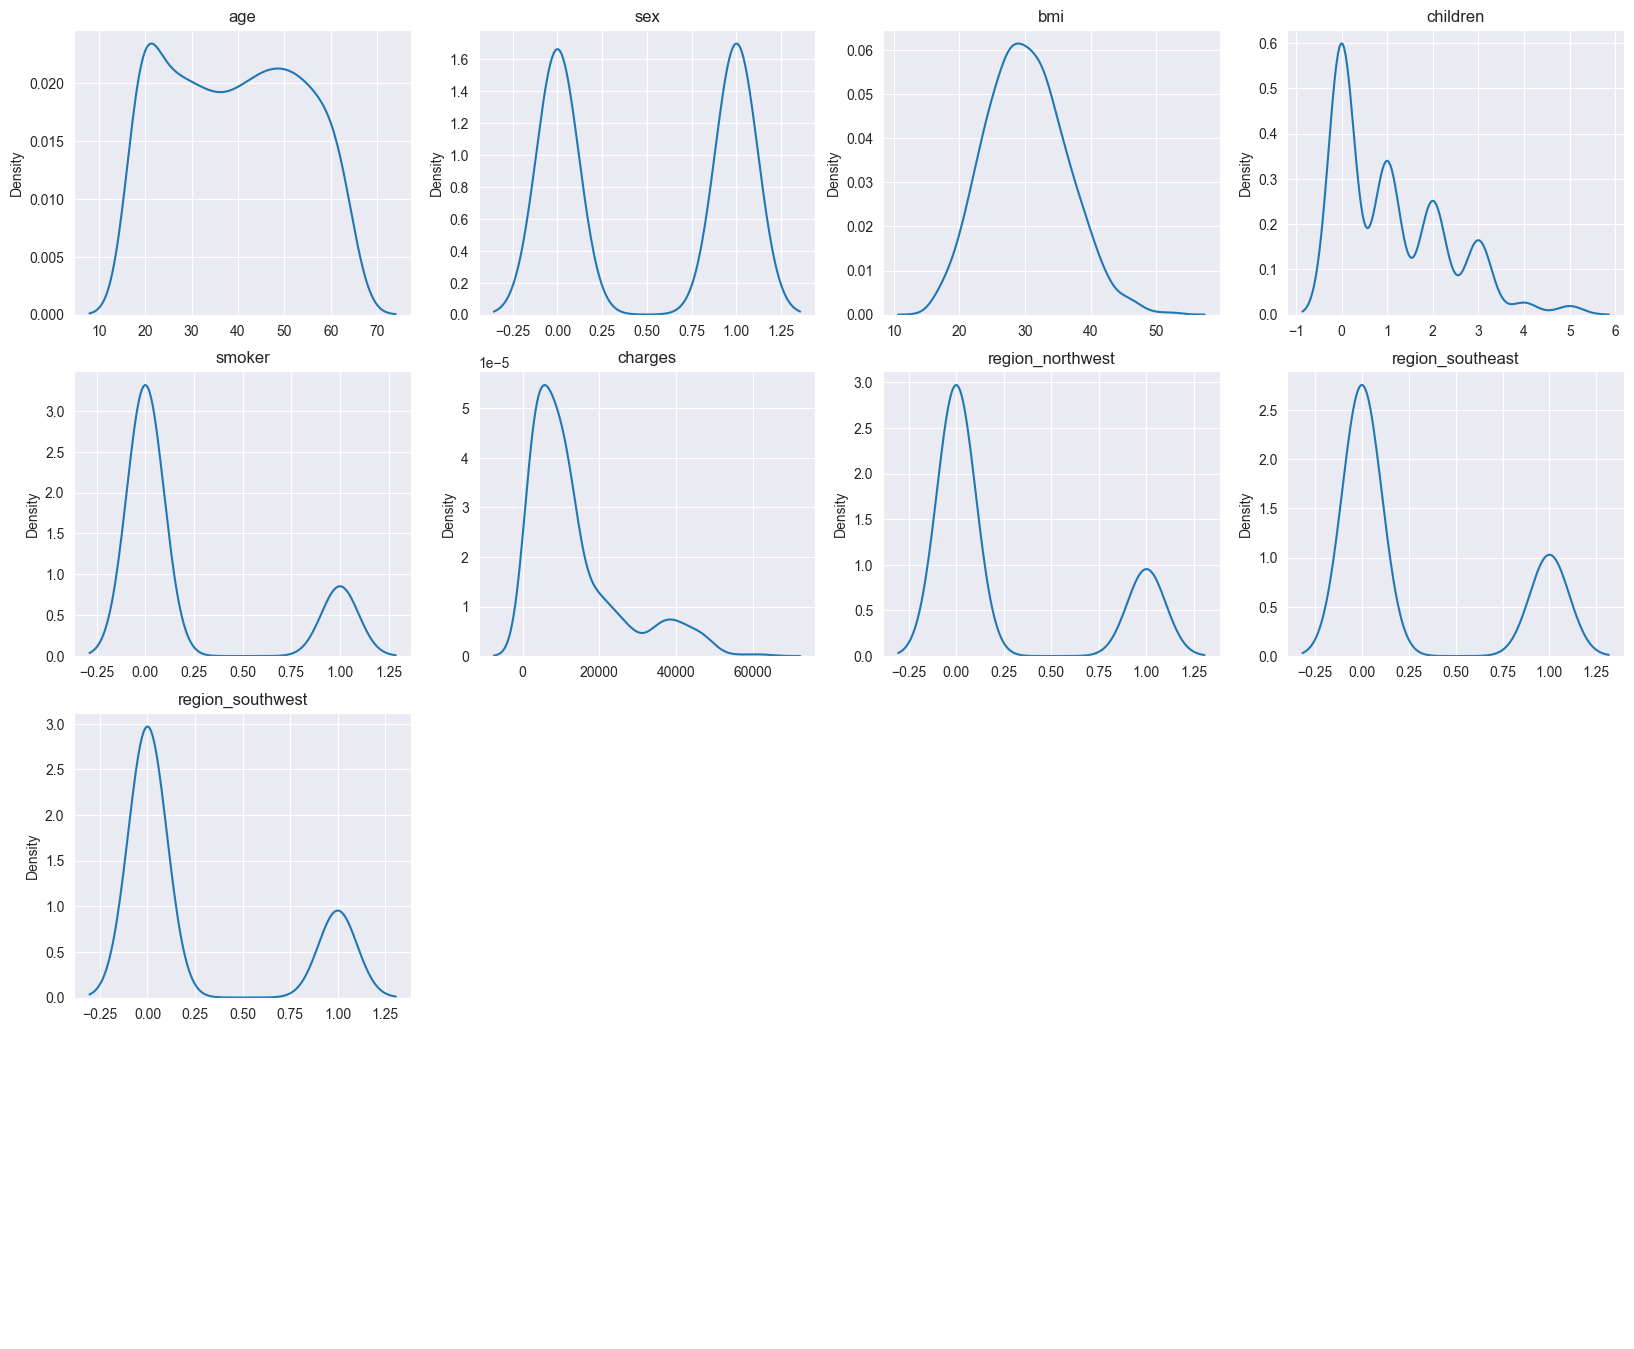

In [50]:
columns = df.columns
(fig, ax) = plt.subplots(4,4,figsize=(20,17))
ax = ax.flatten()

for x,column in enumerate(columns):
    sns.kdeplot(
        data = df,
        x = column,
        ax = ax[x],

    )
    ax[x].set_title(column)
    ax[x].set_xlabel(None)

for i in range(x+1,len(ax)):
    ax[i].axis ("off")

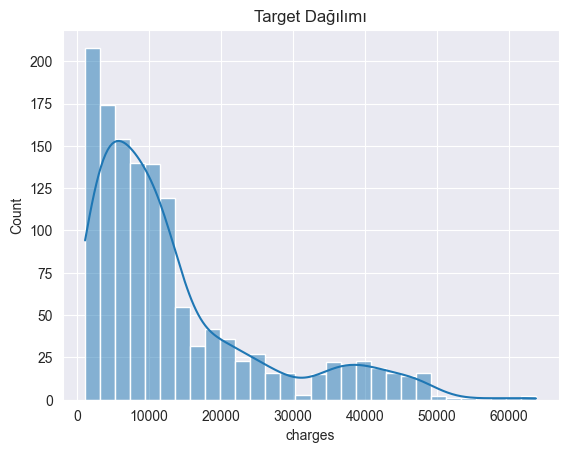

In [52]:
sns.histplot(df['charges'], kde=True)
plt.title('Target Dağılımı')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int64
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int64
 6   region_northwest  1338 non-null   int64
 7   region_southeast  1338 non-null   int64
 8   region_southwest  1338 non-null   int64
dtypes: int64(9)
memory usage: 94.2 KB


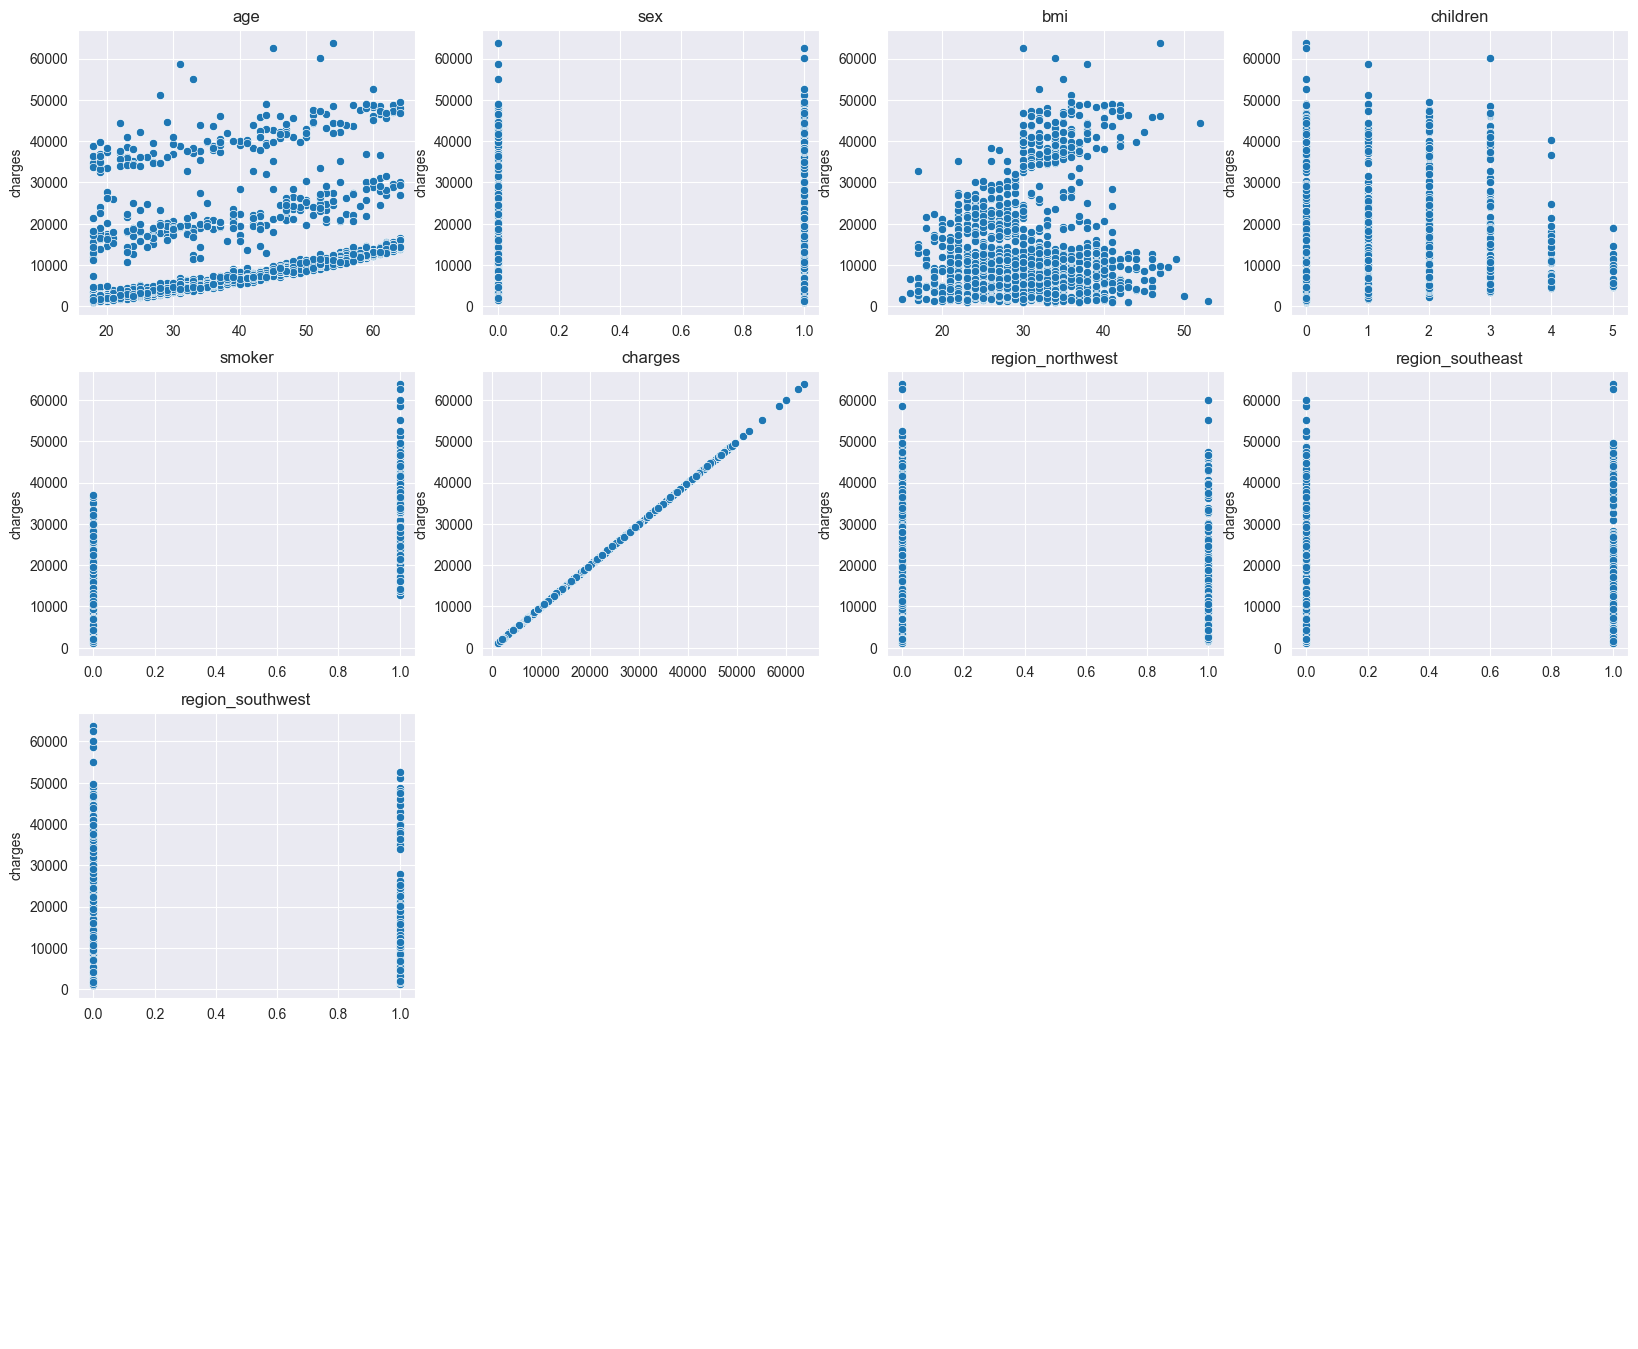

In [61]:
df.info()
columns = df.columns
(fig, ax) = plt.subplots(4, 4, figsize=(20, 17))
ax = ax.flatten()

for x, column in enumerate(columns):
    sns.scatterplot(
        data=df,
        x=column,
        y=df['charges'],
        ax=ax[x],
    )
    ax[x].set_title(column)
    ax[x].set_xlabel(None)

for i in range(x + 1, len(ax)):
    ax[i].axis("off")

In [25]:
X = df.drop("charges", axis=1)
y = df["charges"]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))
print("R2: ",r2_score(y_test,y_pred))

MAE:  2970.6910447761193
MSE:  38399797.21517413
R2:  0.733385730044612


In [35]:
param = {
    "criterion":["squared_error","friedman_mse","absolute_error","poisson"],
    "max_depth":range(1,20),
    "min_samples_leaf":range(1,20),
    "splitter":["best","random"],
    "max_features":["sqrt","log2"]
}

In [36]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param)
grid.fit(X_train,y_train)
y_pred2 = grid.predict(X_test)

In [37]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [39]:
print("\nLinear Regression Model")
print("MAE: ",mean_absolute_error(y_test,y_pred2))
print("MSE: ",mean_squared_error(y_test,y_pred2))
print("R2: ",r2_score(y_test,y_pred2))


Linear Regression Model
MAE:  2388.7014925373132
MSE:  32342790.00597015
R2:  0.775440237419935


Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)
print("\nLinear Regression Model")
print("MAE: ",mean_absolute_error(y_test,y_pred3))
print("MSE: ",mean_squared_error(y_test,y_pred3))
print("R2: ",r2_score(y_test,y_pred3))


Linear Regression Model
MAE:  4022.5044712682393
MSE:  30741029.036289364
R2:  0.7865614506175328


In [41]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 1003, number of used features: 8
[LightGBM] [Info] Start training from score 13373.689930


In [42]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.90       0.90   3725.56   
LGBMRegressor                                0.87       0.88   4198.25   
HistGradientBoostingRegressor                0.87       0.88   4198.77   
RandomForestRegressor                        0.87       0.87   4247.15   
ExtraTreesRegressor                          0.87       0.87   4251.62   
BaggingRegressor                             0.86       0.86   4443.97   
XGBRegressor                                 0.84       0.84   4751.51   
KNeighborsRegressor                          0.83       0.84   4816.26   
AdaBoostRegressor                            0.82       0.83   4982.50   
LassoLarsIC                                  0.78       0.79   5530.61   
LarsCV                                       0.78       0.79   5533.63   
LassoLarsCV                           

SVR

In [65]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [66]:
y_pred4 = model_svr.predict(X_test)
print("\nSVR Model")
print("MAE: ",mean_absolute_error(y_test,y_pred4))
print("MSE: ",mean_squared_error(y_test,y_pred4))
print("R2: ",r2_score(y_test,y_pred4))


SVR Model
MAE:  8262.347249241053
MSE:  154940774.6868166
R2:  -0.07577186665777358


In [75]:
param_grid = {
    "kernel": ["linear", "rbf"],
    "C":[0.1,1,10,100,1000,2000,5000,50000],
    "gamma":["scale","auto"]
}

In [76]:
grid = GridSearchCV(estimator= SVR(), param_grid= param_grid, n_jobs= -1, cv= 5, verbose= 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [77]:
grid.best_params_

{'C': 50000, 'gamma': 'scale', 'kernel': 'rbf'}

In [78]:
y_pred5 = grid.predict(X_test)
print("\nSVR Model")
print("MAE: ",mean_absolute_error(y_test,y_pred5))
print("MSE: ",mean_squared_error(y_test,y_pred5))
print("R2: ",r2_score(y_test,y_pred5))


SVR Model
MAE:  1641.9378980258828
MSE:  17561272.59336927
R2:  0.8780700365230437
